In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_class = pd.read_csv(r"DMC_2017_task/class.csv",delimiter="|",)
df_items = pd.read_csv(r"DMC_2017_task/items.csv",delimiter="|")
df_train = pd.read_csv(r"DMC_2017_task/train.csv",delimiter="|")

In [4]:
df_class

,lineID,day,pid,adFlag,availability,competitorPrice,price
0,1,93,4772,0,1,11.54,12.04
1,2,93,11548,0,2,6.84,8.60
2,3,93,1958,0,1,9.67,10.39
3,4,93,15071,0,2,17.37,16.45
4,5,93,2117,0,1,4.94,5.45
...,...,...,...,...,...,...,...
1210762,1210763,123,11241,1,1,9.78,9.85
1210763,1210764,123,4900,1,1,13.19,14.25
1210764,1210765,123,20837,0,1,7.13,9.85
1210765,1210766,123,3850,1,1,3.52,4.90


In [5]:
df_items

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
0,1,1,2FOI,80,ST,TAB,0,40,NaN,NaN,10.89
1,2,1,2FOI,80,ST,Tab,0,40,NaN,NaN,10.89
2,3,1,2FOI,10,G,GLO,0,40,NaN,NaN,16.45
3,4,1,2FOI,80,ST,TAB,0,40,NaN,NaN,10.89
4,5,2,10OJ03JS,8,ST,PUL,0,40,1.0,NaN,22.53
...,...,...,...,...,...,...,...,...,...,...,...
22030,22031,844,21OIG,100,ST,Tab,0,53,NaN,NaN,13.42
22031,22032,387,22OI3,475,ML,NaN,0,53,8.0,NaN,5.45
22032,22033,19,22OI3,100,G,SAL,0,53,NaN,NaN,6.60
22033,22034,79,22OIO,1,ST,NaN,0,53,NaN,NaN,27.49


In [6]:
df_items.columns

Index(['pid', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'campaignIndex', 'rrp'],
      dtype='object')

In [7]:
df_train

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue
0,1,1,6570,0,2,14.60,1,0,0,16.89,0.00
1,2,1,14922,1,1,8.57,0,1,0,8.75,0.00
2,3,1,16382,0,1,14.77,0,1,0,16.06,0.00
3,4,1,1145,1,1,6.59,0,0,1,6.55,6.55
4,5,1,3394,0,1,4.39,0,0,1,4.14,4.14
...,...,...,...,...,...,...,...,...,...,...,...
2755998,2755999,92,15767,0,1,22.41,1,0,0,18.64,0.00
2755999,2756000,92,2087,0,1,36.87,1,0,0,43.18,0.00
2756000,2756001,92,2944,0,1,4.71,1,0,0,5.59,0.00
2756001,2756002,92,3853,1,1,6.59,0,1,0,6.33,0.00


In [8]:
df_train =df_train[df_train['price'] > 0]

### Finding Null values

In [9]:
df_class.isnull().sum()

lineID                 0
day                    0
pid                    0
adFlag                 0
availability           0
competitorPrice    38005
price                  0
dtype: int64

In [10]:
df_train.isnull().sum()

lineID                  0
day                     0
pid                     0
adFlag                  0
availability            0
competitorPrice    100687
click                   0
basket                  0
order                   0
price                   0
revenue                 0
dtype: int64

In [11]:
df_items.isnull().sum()

pid                   0
manufacturer          0
group                 0
content               0
unit                  0
pharmForm          2327
genericProduct        0
salesIndex            0
category           4627
campaignIndex     20697
rrp                   0
dtype: int64

### Count different values of different columns

In [44]:
df_train['adFlag'].value_counts()

0    1880176
1     875827
Name: adFlag, dtype: int64

In [45]:
df_train['availability'].value_counts()

1    2515572
2     185194
3      44893
4      10344
Name: availability, dtype: int64

In [46]:
df_train['click'].value_counts()

1    1582827
0    1173176
Name: click, dtype: int64

In [47]:
df_train['basket'].value_counts()

0    2287917
1     468086
Name: basket, dtype: int64

### EDA step

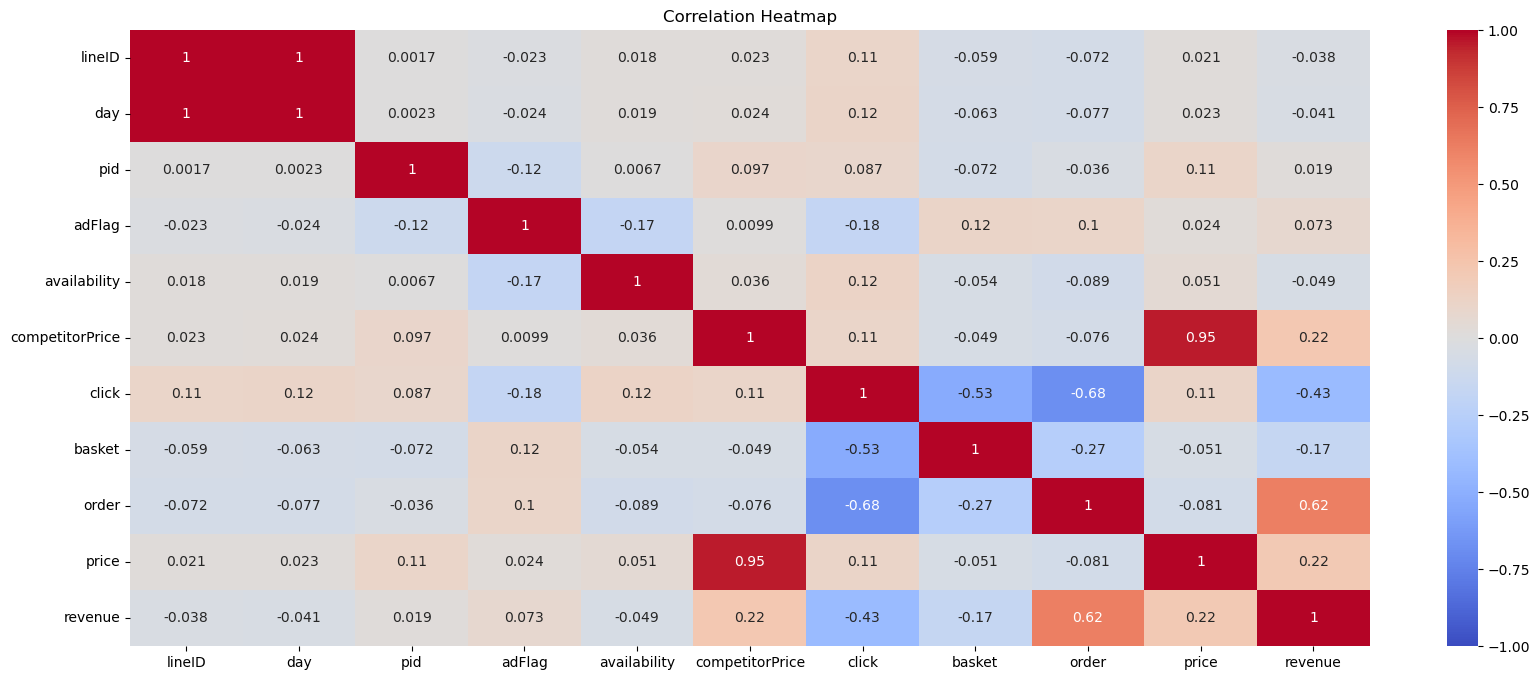

In [12]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Note := The realation between the competitorPrice and current price is very strong

In [13]:
# unique product in the dataset

len(df_train['pid'].unique()) # dataframe has 21928 unique product 

21928

In [14]:
# Total days

len(df_train['day'].unique()) # 92 days record

92

##### Relation of null values with particular product

    => In this i want to find if there particular null values of particular product than we can remove those products or 
       replace null values with some values

In [15]:
null_counts = df_train.groupby('pid')['competitorPrice'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')
sorted_products = null_counts.sort_values(by='null_count', ascending=False)

In [16]:
sorted_products

,pid,null_count
21782,21888,2005
14655,14727,1625
15889,15965,976
21926,22034,899
21544,21647,876
...,...,...
7642,7681,0
7641,7680,0
7640,7679,0
7639,7678,0


In [17]:
# Find how many records have null values
count_zeros = (sorted_products['null_count'] == 0).sum() # 19062 products have null values

In [18]:
# find how many columns have more than 100 unique values

count_greter_100 = (sorted_products['null_count'] > 100).sum() # 232 products have more than 100 null values
count_greter_100

232

In [19]:
# find how many columns have more than 5 unique values
count_greter_5 = (sorted_products['null_count'] > 5).sum()
count_greter_5

1736

In [20]:
d = sorted_products.iloc[:10,:10]

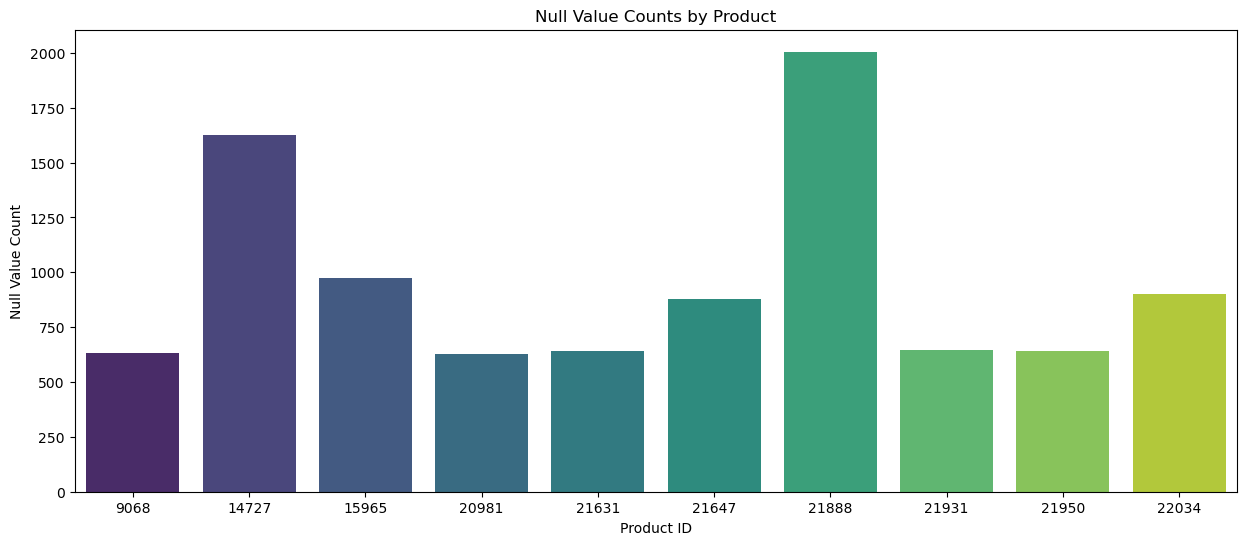

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(x='pid', y='null_count', data=d, palette='viridis')
plt.title("Null Value Counts by Product")
plt.xlabel("Product ID")
plt.ylabel("Null Value Count")
plt.show()

In [22]:
sorted_products.head(50)

,pid,null_count
21782,21888,2005
14655,14727,1625
15889,15965,976
21926,22034,899
21544,21647,876
21824,21931,647
21842,21950,643
21528,21631,641
9025,9068,631
20881,20981,627


#### Now Analysis null values with day wise
    
    By this we can estimate that if there are unique values in the particlular day than we can take action on it

In [23]:
null_counts_day_wise = df_train.groupby('day')['competitorPrice'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')
sorted_products = null_counts_day_wise.sort_values(by='null_count', ascending=False)

In [24]:
sorted_products

,day,null_count
39,40,1581
32,33,1567
60,61,1540
81,82,1529
56,57,1518
...,...,...
7,8,569
21,22,539
8,9,511
15,16,459


result => There are more than 415 unique values in particular data so we can not remove any day.

#### show the how many product is sold on particular date

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

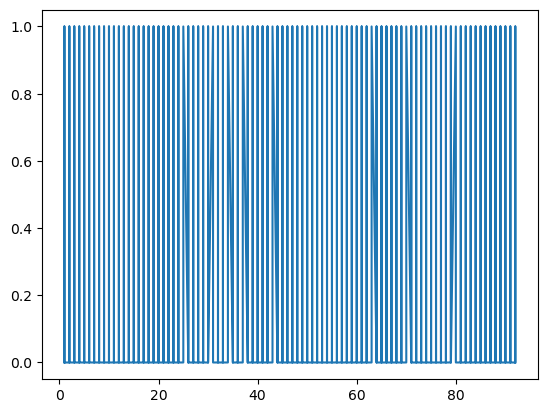

In [25]:
plt.plot(df_train['day'],df_train['order'])
plt

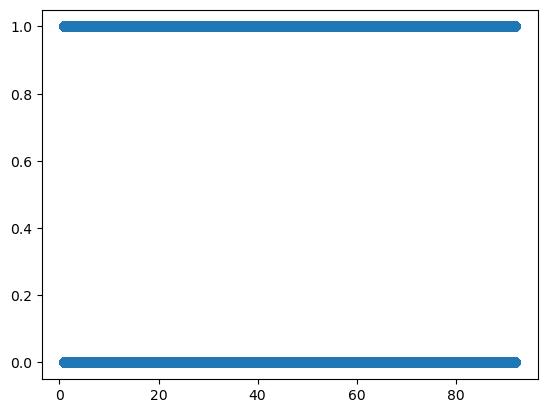

In [26]:
plt.scatter(df_train['day'],df_train['order'])
plt.show()

In [27]:
# find values
# Order has only two values either 0 and 1

df_train['order'].value_counts()

0    2050913
1     705090
Name: order, dtype: int64

In [28]:
# Price values

df_train['price'].value_counts()

10.95     104302
7.65      102184
6.55      100421
15.35      88724
8.75       72767
           ...  
110.14         1
82.63          1
103.51         1
76.37          1
92.59          1
Name: price, Length: 7475, dtype: int64

Note := In this dataset there are different prices but quantity sold or order is either 0 or 1 so there  are no sesonality in this data

#### Now notice random 100 product and show how many time price has been changed respectively day

In [29]:
# Take 100 random product 
random_values = df_train['pid'].sample(n=100, random_state=42).to_list()

In [32]:
for i in random_values:
    d = df_train[df_train['pid'] == i]
    price_values = d['price'].value_counts().to_list()
    print("The product_id: ",i," is changed: ",len(d)," times")
    
# This is how many times price has been changed per all the days

The product_id:  106  is changed:  287  times
The product_id:  6178  is changed:  3309  times
The product_id:  14563  is changed:  163  times
The product_id:  1224  is changed:  2213  times
The product_id:  11280  is changed:  33  times
The product_id:  7680  is changed:  6089  times
The product_id:  8926  is changed:  315  times
The product_id:  15851  is changed:  368  times
The product_id:  7626  is changed:  118  times
The product_id:  1540  is changed:  14  times
The product_id:  18738  is changed:  240  times
The product_id:  8215  is changed:  600  times
The product_id:  21002  is changed:  1643  times
The product_id:  13956  is changed:  2188  times
The product_id:  13956  is changed:  2188  times
The product_id:  19845  is changed:  1565  times
The product_id:  11718  is changed:  1437  times
The product_id:  4717  is changed:  43  times
The product_id:  9677  is changed:  2532  times
The product_id:  2655  is changed:  53785  times
The product_id:  2655  is changed:  53785  t

#### Now check if price is changed  multiple times per day or not

In [34]:
# Take 100 random product 
random_values = df_train['pid'].sample(n=100, random_state=36).to_list()

for i in random_values:
    d  = df_train[df_train['day'] == 1]
    d = d[d['pid'] == i]
    price_values = d['price'].value_counts().to_list()
    print("The product_id: ",i," is changed: ",len(d)," times in one day")
    
# By this we can say that price has been changed multiple times per day

The product_id:  106  is changed:  1  times in one day
The product_id:  6178  is changed:  17  times in one day
The product_id:  14563  is changed:  4  times in one day
The product_id:  1224  is changed:  9  times in one day
The product_id:  11280  is changed:  0  times in one day
The product_id:  7680  is changed:  49  times in one day
The product_id:  8926  is changed:  3  times in one day
The product_id:  15851  is changed:  3  times in one day
The product_id:  7626  is changed:  1  times in one day
The product_id:  1540  is changed:  0  times in one day
The product_id:  18738  is changed:  2  times in one day
The product_id:  8215  is changed:  4  times in one day
The product_id:  21002  is changed:  16  times in one day
The product_id:  13956  is changed:  17  times in one day
The product_id:  13956  is changed:  17  times in one day
The product_id:  19845  is changed:  13  times in one day
The product_id:  11718  is changed:  14  times in one day
The product_id:  4717  is changed

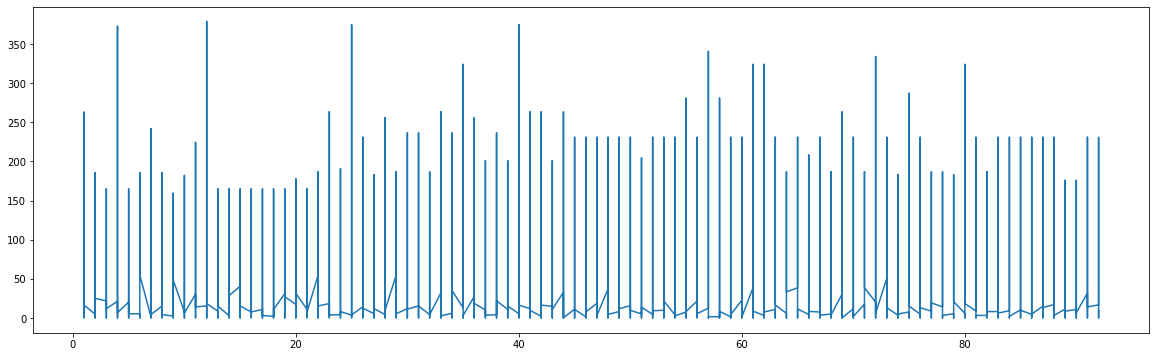

In [5]:
# day and price price
plt.figure(figsize=(20, 6))
plt.plot(vis_data["day"], df_train['price'])

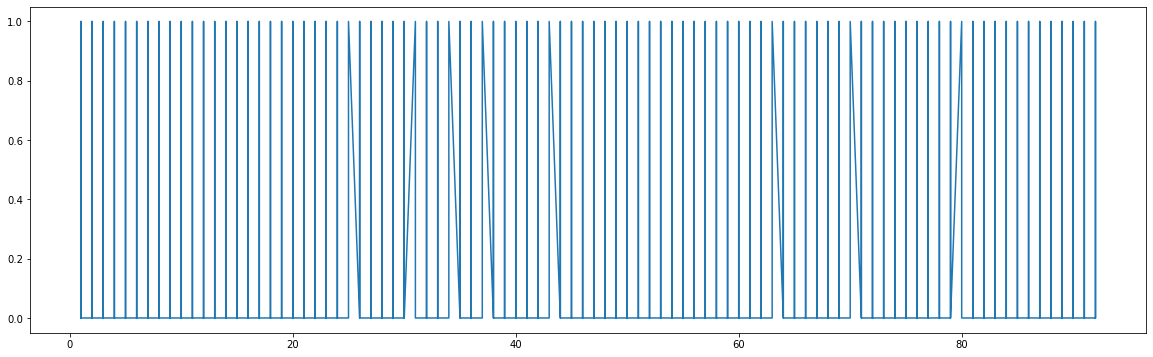

In [6]:
# day with order
plt.figure(figsize=(20, 6))
plt.plot(vis_data["day"], df_train['order'])

In [14]:
# If we group product sell for one day. This will check for All the product not single product

product = df_train.groupby('day')['order'].sum().to_list()

<BarContainer object of 92 artists>

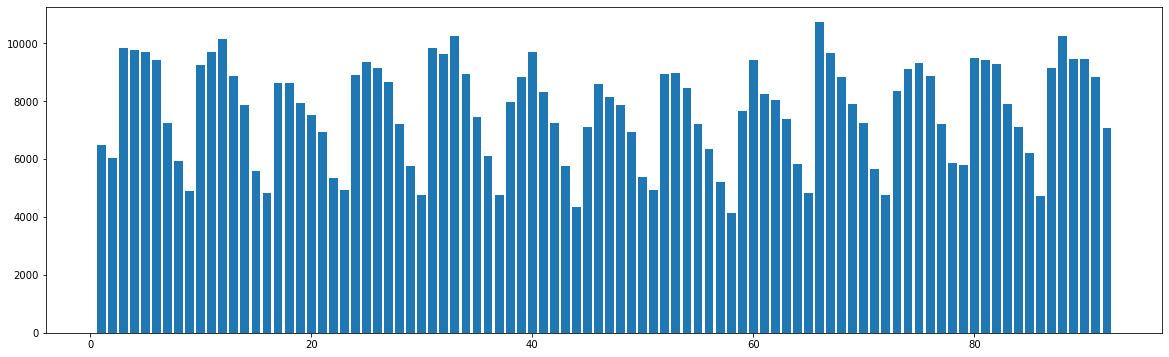

In [15]:
d = np.arange(1,93,1)
plt.figure(figsize=(20,6))
plt.bar(d,product)

Result: From this graph we can see that every 8th day has spike and day 1 to 3 has high sells after day order is declined in the 
        day 4,5,6,7 after again from 8th it will sold most 

### In this we take random 10 product show there orders :

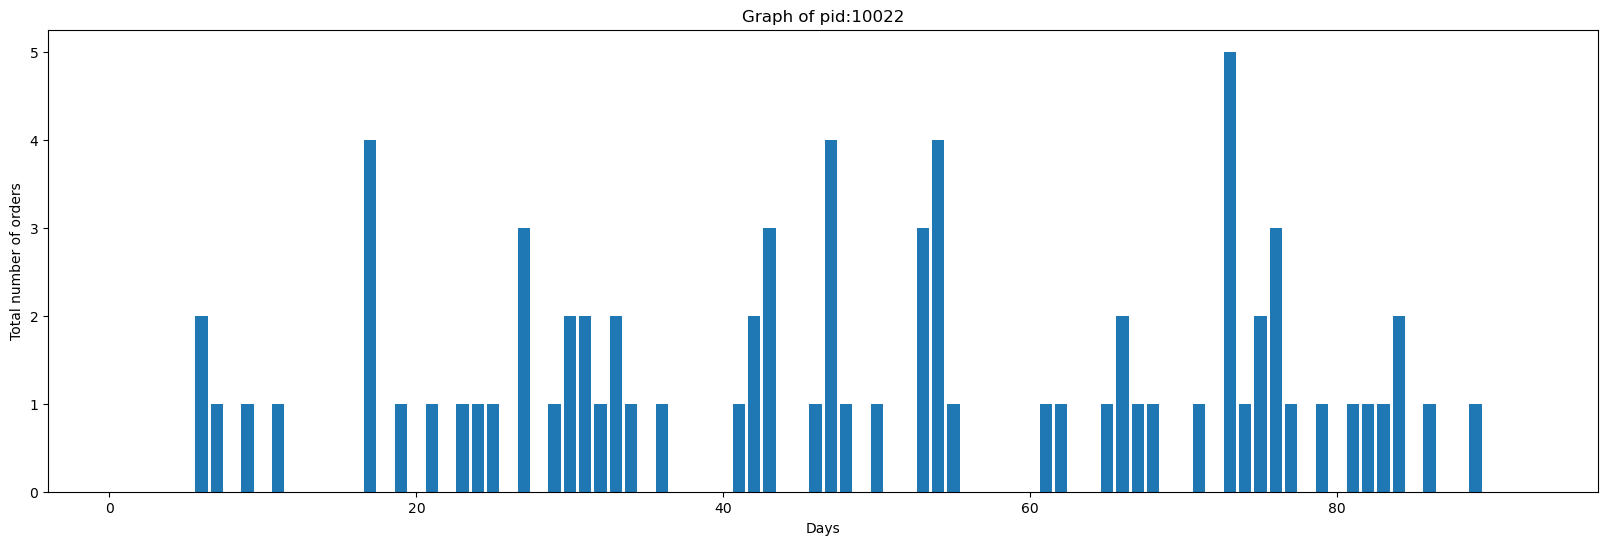

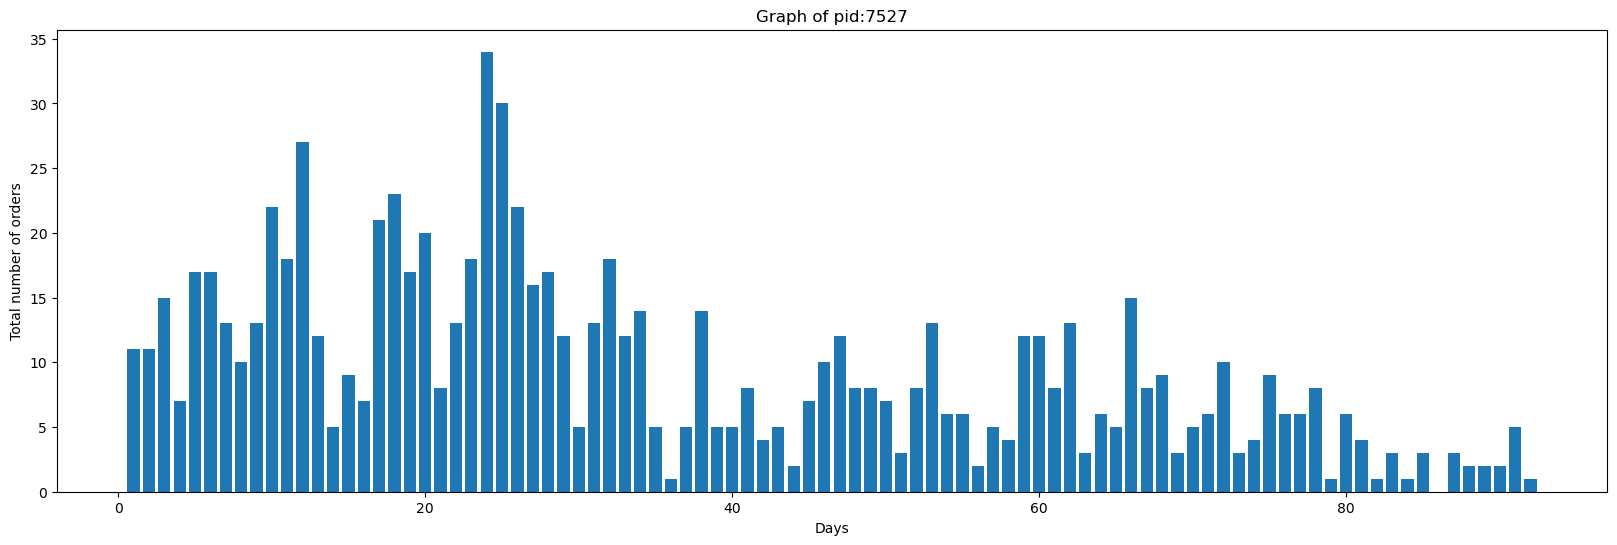

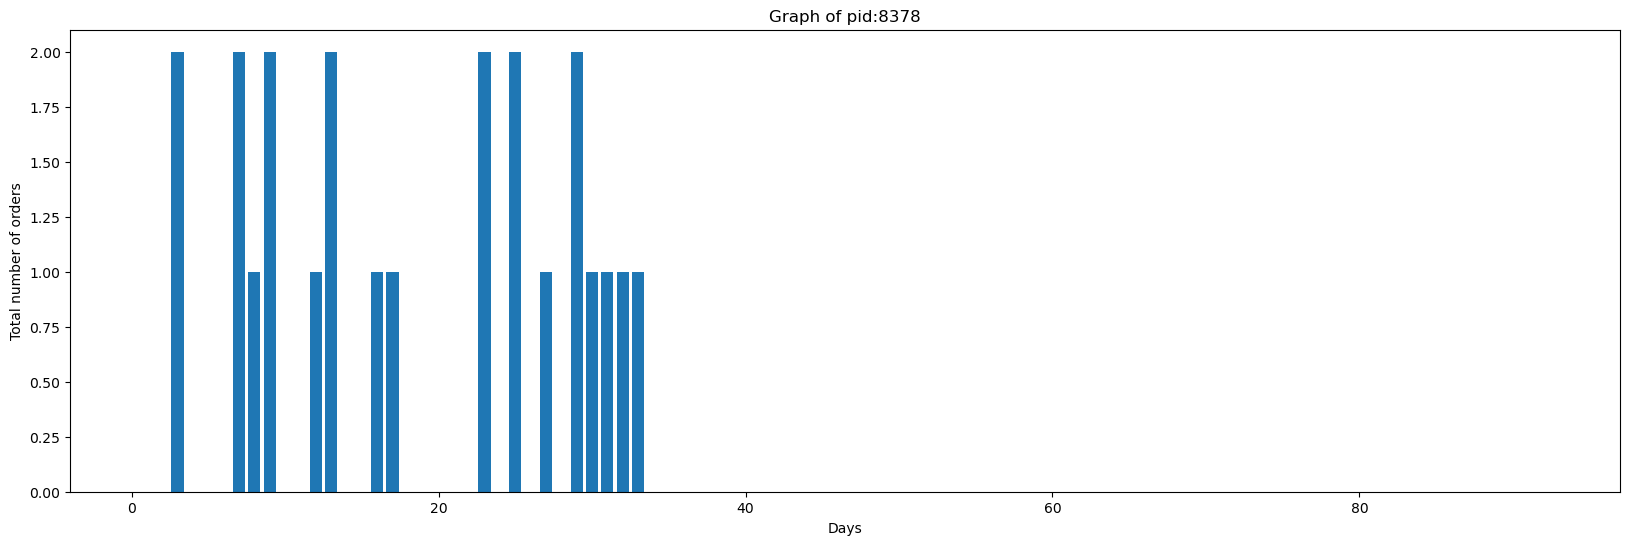

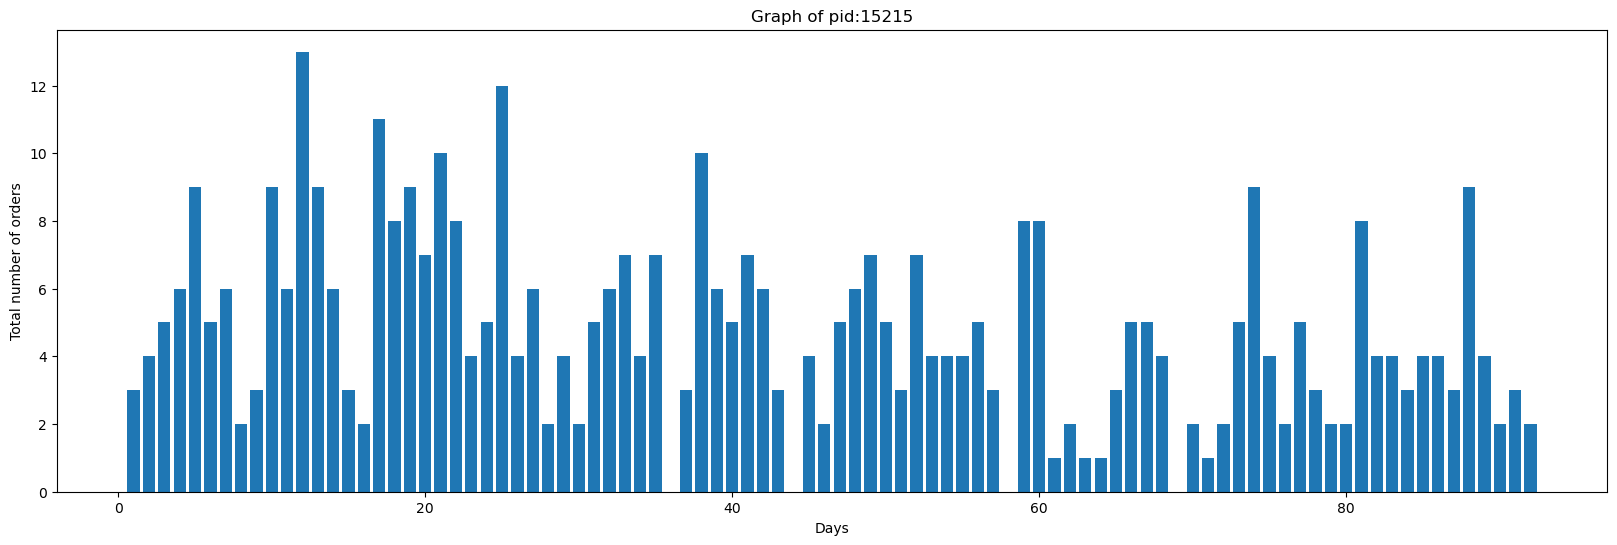

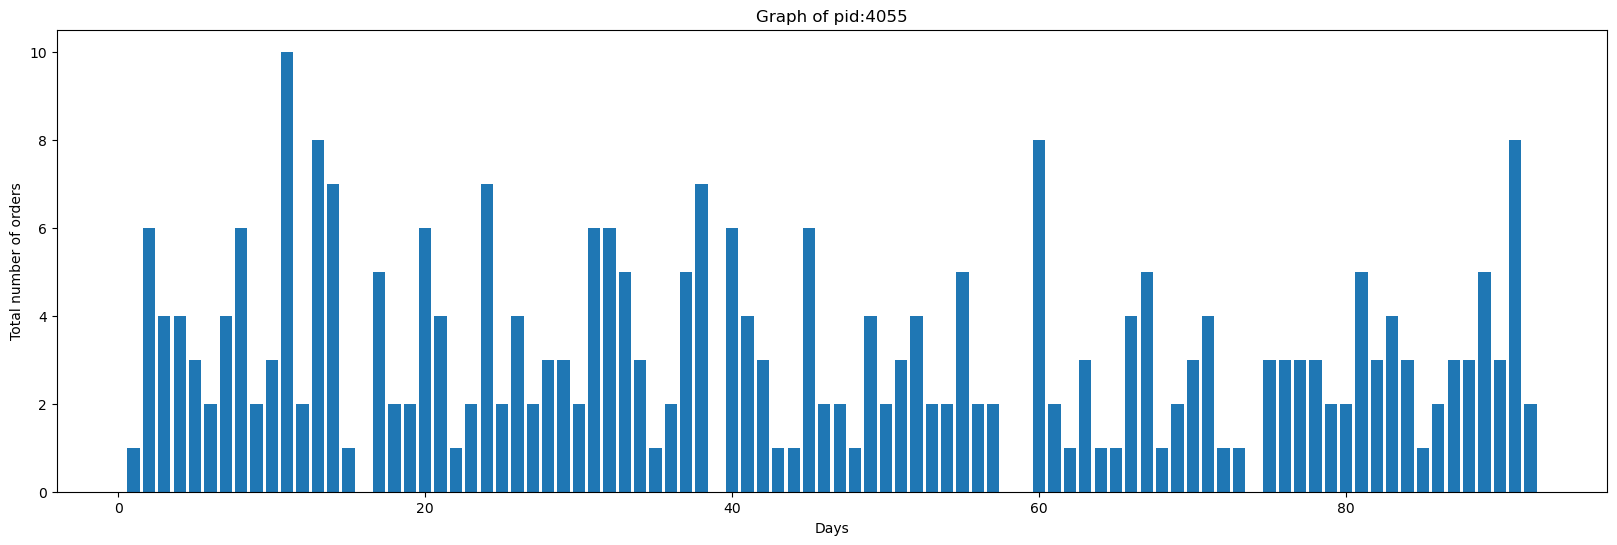

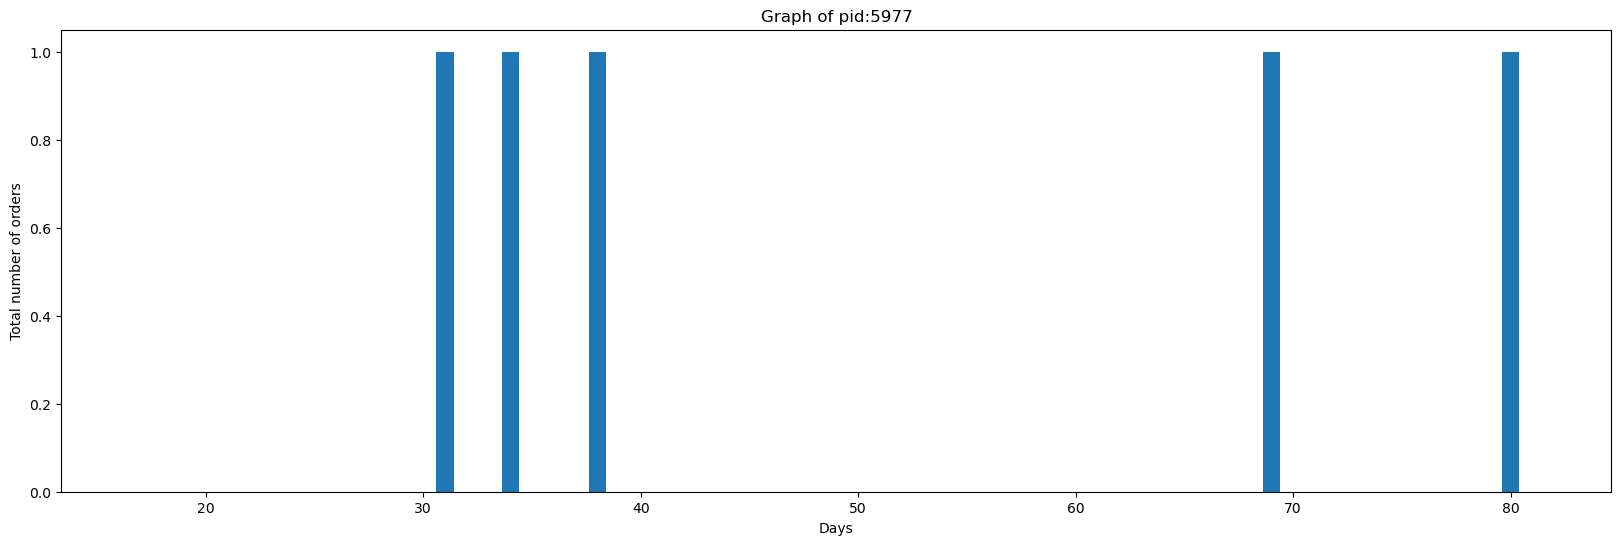

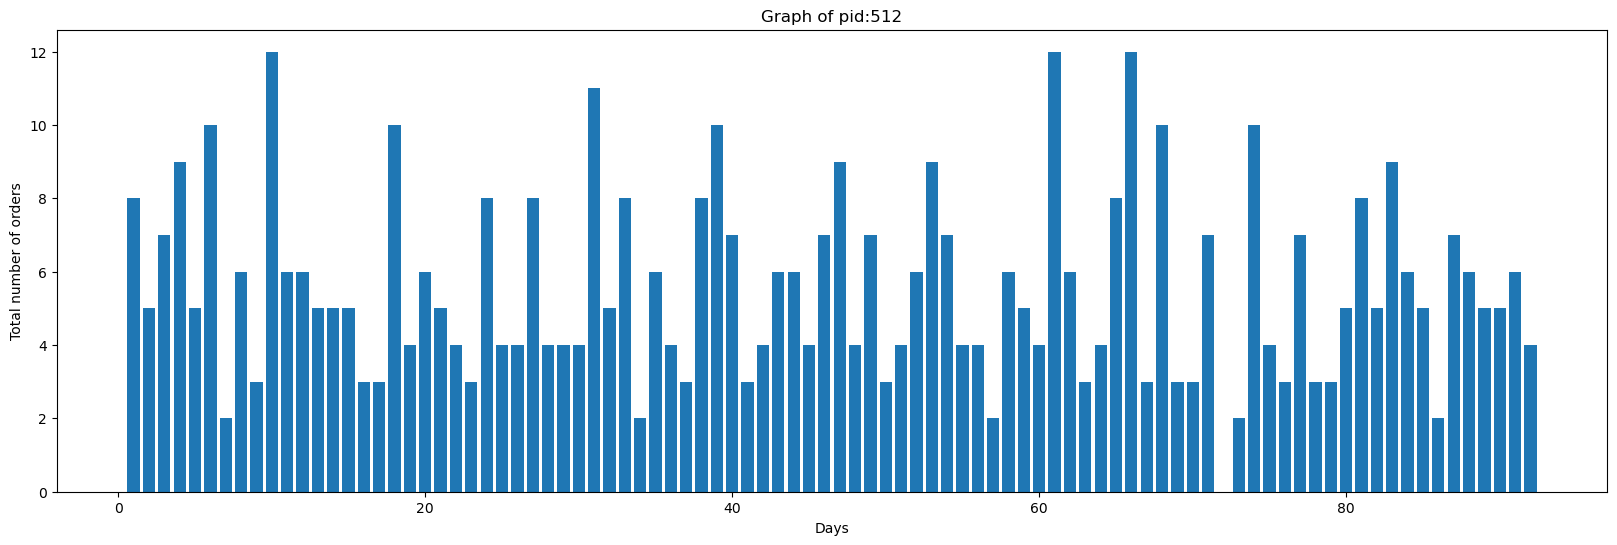

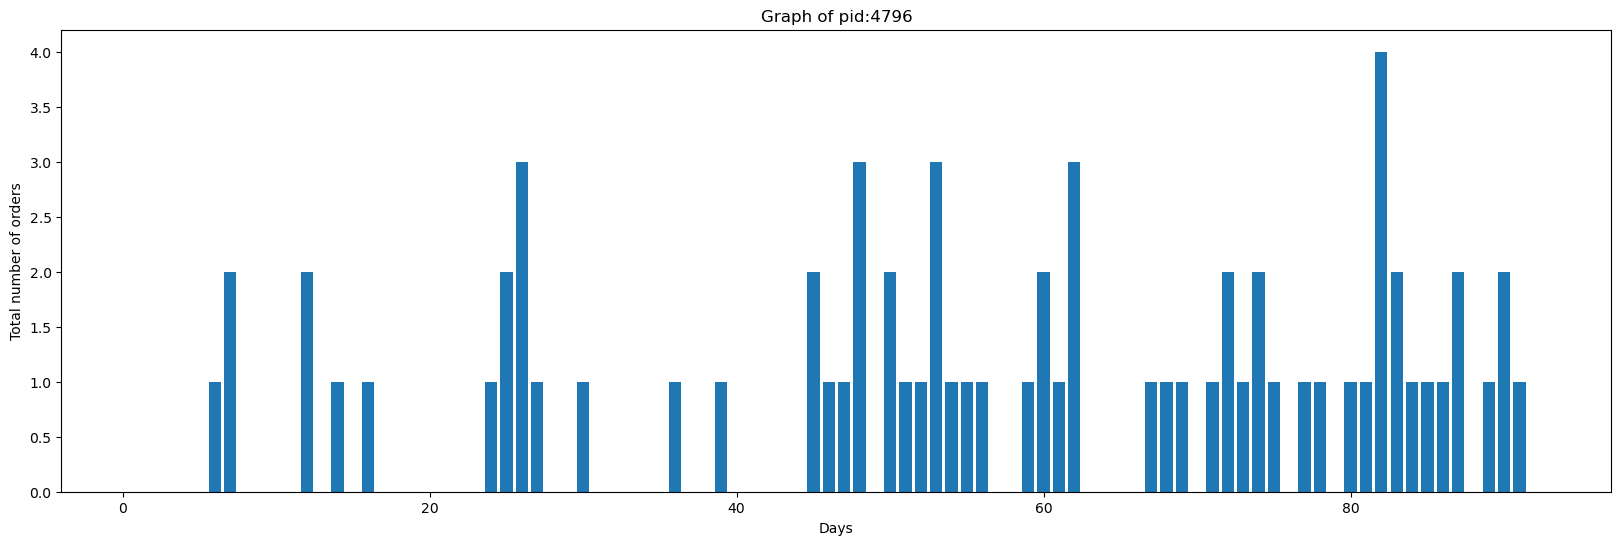

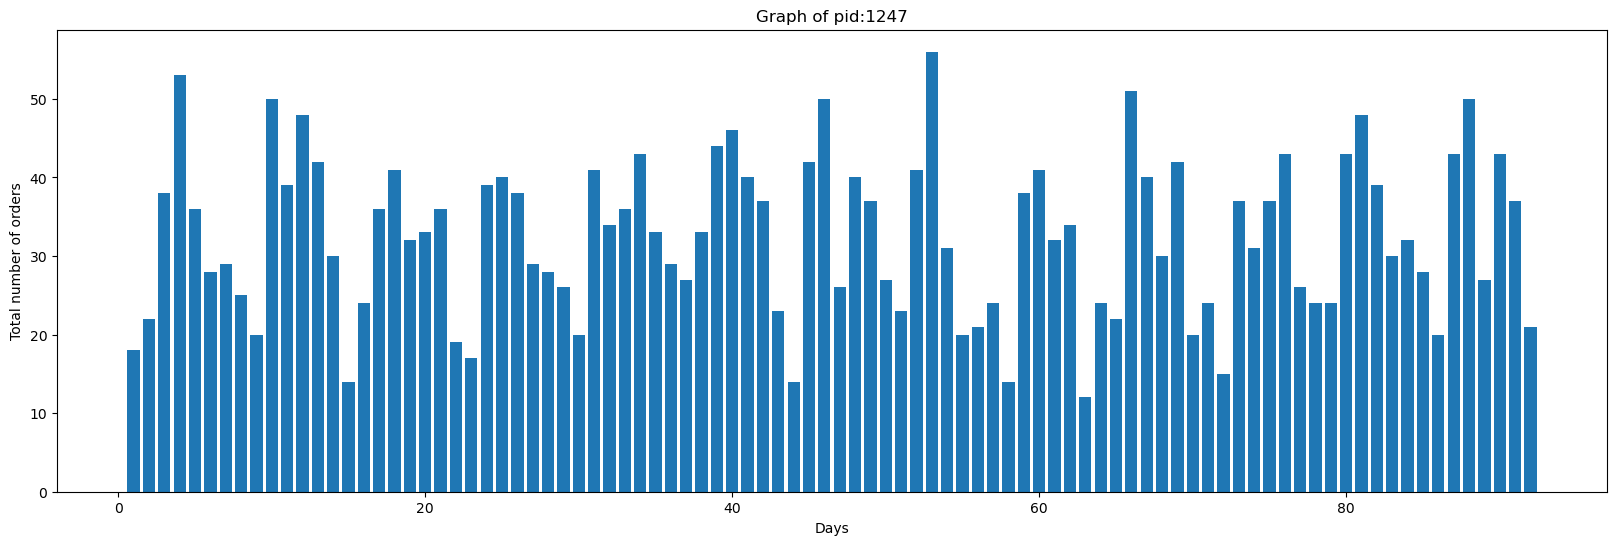

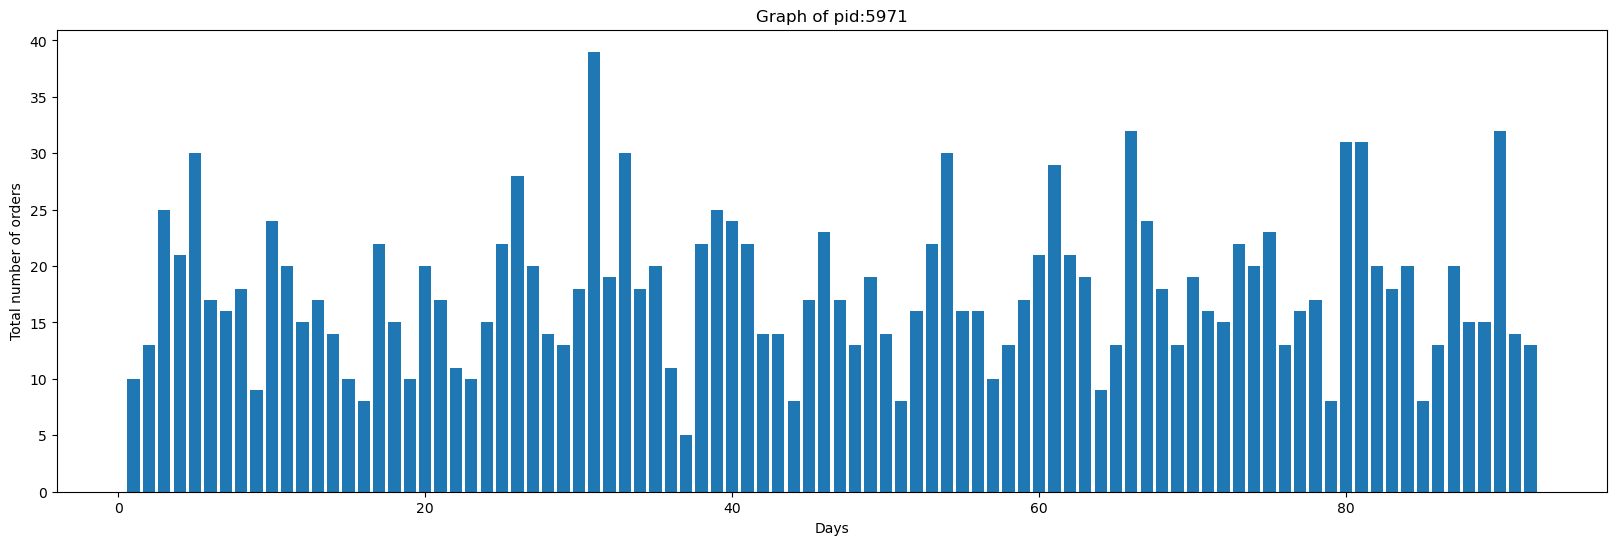

In [43]:
random_values = df_train['pid'].sample(n=10, random_state=37).to_list()

for i in random_values:
    d  = df_train[df_train['pid'] == i]
    product = d.groupby('day')['order'].sum().to_list()
    day = d['day'].unique().tolist()
    plt.figure(figsize=(20,6))
    plt.bar(day,product)
    plt.title("Graph of pid:{}".format(i))
    plt.xlabel("Days")
    plt.ylabel("Total number of orders")
    
    
    

result: If we draw graph by product wise than we can say that there are no seasonality in the data

###  In this we will see, can avalibility can inpect on price and order

In [16]:
df_train.columns

Index(['lineID', 'day', 'pid', 'adFlag', 'availability', 'competitorPrice',
       'click', 'basket', 'order', 'price', 'revenue'],
      dtype='object')

<Figure size 1440x576 with 0 Axes>

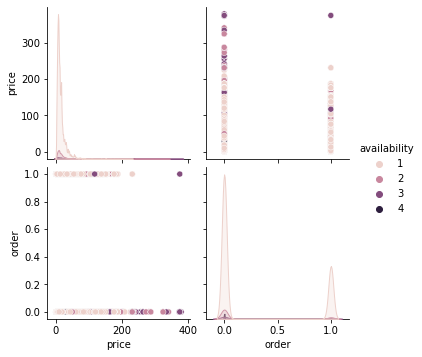

In [18]:
plt.figure(figsize=(20, 8))
sns.pairplot(df_train[["price","order","availability"]],hue="availability")